In [1]:
import sys, os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
parent_dir = os.path.abspath(os.pardir)
libpath = os.path.join(parent_dir, 'c3dp_source')
outpath = os.path.join(parent_dir, 'out')
mantid_path = os.path.join (parent_dir, 'mantid')

if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [3]:
cell_name = 'empty_Clampcell_without_sample_exp'
cell_sample_name = 'Clampcell_with_sample_exp_b4'
cell_sample_colli_name = 'SNAP_43682_masked.nxs'

cell_sample_colli = os.path.join (mantid_path, cell_sample_colli_name)

cell_with_sample = os.path.join (mantid_path, cell_sample_name)
only_cell = os.path.join (mantid_path, cell_name)

In [4]:
import masking_nexus_givenKernel as mask
masked_template = 'coll_exp_masked.nxs'

masked_onlycell_path = os.path.join(mantid_path, '{}_masked.nxs'.format(cell_name))

masked_cell_sample_path = os.path.join(mantid_path, '{}_masked.nxs'.format(cell_sample_name))

masked_template_path = os.path.join(mantid_path, '{}'.format(masked_template) )

mask.masking(cell_with_sample, masked_template_path, masked_cell_sample_path)
mask.masking(only_cell, masked_template_path, masked_onlycell_path)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
import reduce_nexasdata_using_mantid as red
import normalization_by_area as nrm

In [6]:
step = 0.01

In [7]:
binning = [0.5, step, 4.]

d_onlyCell, I_onlyCell, error_onlyCell = red.mantid_reduction(masked_onlycell_path, binning)

d_cell_sample, I_cell_sample, error_cell_sample = red.mantid_reduction(masked_cell_sample_path, binning)

In [8]:
d_colli, I_colli, error_colli = red.mantid_reduction(cell_sample_colli, binning)

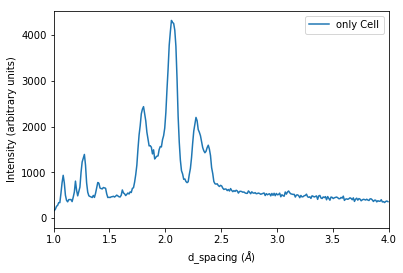

In [9]:
plt.figure()

plt.plot (d_onlyCell, I_onlyCell, label ="only Cell")
# plt.plot (d_cell_sample, I_cell_sample, label ="cell+sample")
# plt.plot (d_exp, I_exp, label ="exp")
plt.legend()
# plt.errorbar (d_exp, I_exp, error_exp)
plt.xlim(1,4)
plt.xlabel('d_spacing ($\AA$)')
plt.ylabel('Intensity (arbitrary units)')
plt.show()

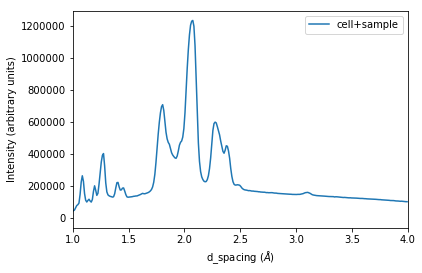

In [10]:
plt.figure()

# plt.plot (d_onlyCell, I_onlyCell*270.+800, label ="only Cell")
plt.plot (d_cell_sample, I_cell_sample, label ="cell+sample")
# plt.plot (d_exp, I_exp, label ="exp")
plt.legend()
# plt.errorbar (d_exp, I_exp, error_exp)
plt.xlim(1,4)
plt.xlabel('d_spacing ($\AA$)')
plt.ylabel('Intensity (arbitrary units)')
plt.show()

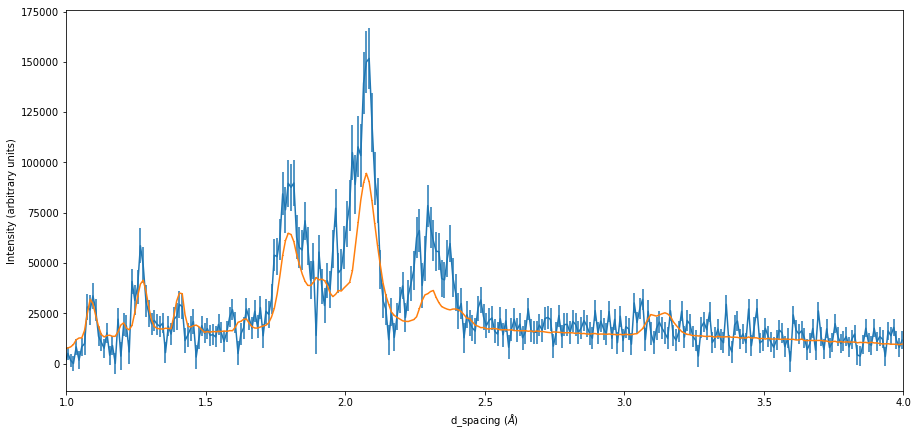

In [12]:
plt.figure(figsize=(15,7))
plt.errorbar (d_cell_sample, abs(I_cell_sample-I_onlyCell*255.),  abs(error_cell_sample-error_onlyCell*255.),  label ="cell+sample-cell")
plt.errorbar (d_colli, (I_colli*2)+100, error_colli, label ="withColli")
# plt.plot (d_exp, I_exp, label ="exp")
# plt.legend()
# plt.errorbar (d_exp, I_exp, error_exp)
plt.xlim(1,4)
plt.xlabel('d_spacing ($\AA$)')
plt.ylabel('Intensity (arbitrary units)')
plt.show()